# Issue NSW and instore prices

## Executive summary

In this notebook, I will look at an issue that appears as a CVR% drop due to the In-Store Prices experiment. After taking a look, we think that more elements could be involved in the explanation of why we see this data

**Business questions answered:**

- **XXX?** -->
- **XXX2?** -->

## Config

In [74]:
import matplotlib.pyplot as  plt
# import numpy as np
import pandas as pd
import seaborn as sns
import sys

sys.path.append('c:\\Users\\Jordi Cremades\\Documents\\Repository')

# from utils import dataset_meta_stats
# from utils import dataset_stats
from utils import query_engines

# dms = dataset_meta_stats.DatasetMetaStats() 
# ds = dataset_stats.DatasetStats()

## [X] Task 1: What is the problem?

![Example Image](inputs/Screenshot_1.png)

[Link](https://glovoapp2.cloud.looker.com/explore/mfc_dm/groceries_nsw_tracker_v0?qid=OwOzhqfz5ERpRouhHgRxrM&origin_space=4713&toggle=vis) What I see there is that after a certain date close to JAN 15 the CVR% of Variant is lower than for Control. This CVR% is the number of ordres that end up creating an order in a Store with a Category id from Groceries. And this is divided by the number of sessions that reach the NSW from a Category id from Groceries

![Example Image](inputs/Screenshot_3.png)

[Link](https://glovoapp2.cloud.looker.com/explore/mfc_dm/groceries_nsw_tracker_v0?qid=y5pcDpUmyA7VJ9CDfEda6j&origin_space=4713&toggle=vis) After the 1st JAN and aroudn 25 MAR the number of orders that are created after bubble keep on dropping.

![Example Image](inputs/Screenshot_4.png)

[LINK](https://glovoapp2.cloud.looker.com/explore/mfc_dm/groceries_nsw_tracker_v0?qid=BlKHuNVmzHFMTnJiSQegST&origin_space=4713&toggle=vis) Again after the 2 changes in 1st JAN and 25th MAR we see a constant drop in the number of sessions

## [X] Task 2: Lets replicate looker data using Dave query

The first step I want to do in this analysis is to find the same exact data that Looker is showing, but using Daves data product queries

In [ ]:
# parameters

# category_id
LIST_CATEGORY_ID = [4, 540, 622, 679, 682, 762, 875, 1015, 1082, 1195, 1197, 1214, 1314, 1316, 1551, 1718]
list_category_id = ",".join(str(val) for val in LIST_CATEGORY_ID)
# dates
START_EXPERIMENT = "'2023-04-22'"
END_EXPERIMENT = "'2024-04-22'"
# dates SV
SV_START_EXPERIMENT = "'2024-02-09'"
SV_END_EXPERIMENT = "'2024-02-16'"
# toggles
TOGGLE_INSTORE = "'ZAP_NSW_EXPERIMENT'"
TOGGLE_NSW = "'ZAP_CATEGORY_LANDING_PAGE'"

params = [
    # category_id
    {'name':'list_category_id', 'value':list_category_id},
    # dates
    {'name':'start_experiment', 'value':START_EXPERIMENT},
    {'name':'end_experiment', 'value':END_EXPERIMENT},
    {'name':'sv_start_experiment', 'value':SV_START_EXPERIMENT},
    {'name':'sv_end_experiment', 'value':SV_END_EXPERIMENT},
    # toggles
    {'name':'toggle_instore', 'value':TOGGLE_INSTORE},
    {'name':'toggle_nsw', 'value':TOGGLE_NSW},
]

q = query_engines.QueryEngines(
    query='task2/looker.sql', 
    params=params,
    load_from_output_file=None, #with no .csv
    output_file='looker', #with no .csv
    printq=1
)

df = q.query_run_starbust()

We have prepared the total query, but it is to big to run in local, thus we have created a pipeline in [Airflow](analysis/tmp/issue_nsw_and_instore_prices_2024/queries/task2/looker.sql)

### Task 2.1 Same as graphs as in top

We now only focus in the 3 plots above, the first one is the CVR

In [141]:
# parameters

# category_id
LIST_CATEGORY_ID = [4, 540, 622, 679, 682, 762, 875, 1015, 1082, 1195, 1197, 1214, 1314, 1316, 1551, 1718]
list_category_id = ",".join(str(val) for val in LIST_CATEGORY_ID)
# dates
START_EXPERIMENT = "'2023-09-01'"
END_EXPERIMENT = "'2024-04-22'"
# dates SV
SV_START_EXPERIMENT = "'2024-02-09'"
SV_END_EXPERIMENT = "'2024-02-16'"
# toggles
TOGGLE_INSTORE = "'ZAP_NSW_EXPERIMENT'"
TOGGLE_NSW = "'ZAP_CATEGORY_LANDING_PAGE'"

params = [
    # category_id
    {'name':'list_category_id', 'value':list_category_id},
    # dates
    {'name':'start_experiment', 'value':START_EXPERIMENT},
    {'name':'end_experiment', 'value':END_EXPERIMENT},
    {'name':'sv_start_experiment', 'value':SV_START_EXPERIMENT},
    {'name':'sv_end_experiment', 'value':SV_END_EXPERIMENT},
    # toggles
    {'name':'toggle_instore', 'value':TOGGLE_INSTORE},
    {'name':'toggle_nsw', 'value':TOGGLE_NSW},
]

q = query_engines.QueryEngines(
    query='task2/looker_cvr.sql', 
    params=params,
    load_from_output_file=None, #with no .csv
    output_file='looker_cvr', #with no .csv
    printq=None
)

df = q.query_run_starbust()

c:\Users\Jordi Cremades\Documents\Repository\utils\query_engines.py:145: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/f8156c44b60758d4a2263bb5575d06c60d037676c6d03f10aa0829843c6522ca


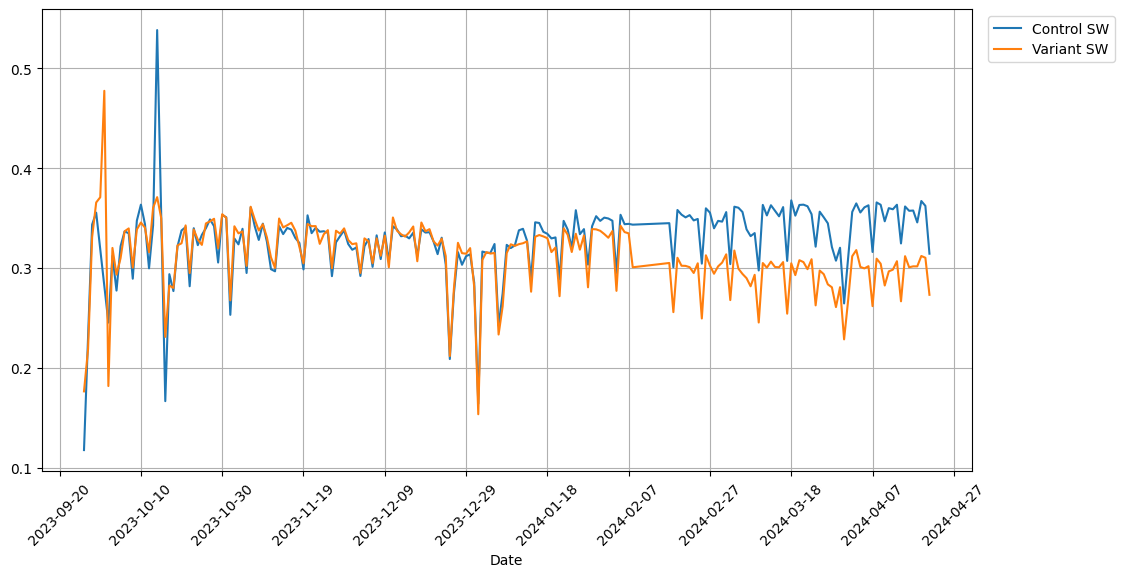

In [158]:
#params
# COND_COUNTRY = ['PT']
# cond_country = df['country'].isin(COND_COUNTRY)

COND_EXPERIMENT_GROUP = ['Variant SW', 'Control SW']
cond_experiment_group = df['exp_group_nsw'].isin(COND_EXPERIMENT_GROUP)

# COND_PLATFORM = ['ANDROID','IOS','DESKTOP']
# cond_platform = df['platform'].isin(COND_PLATFORM)

tmp_filtered = df[cond_experiment_group]

#group data
tmp_group = tmp_filtered.groupby(['p_creation_date','exp_group_nsw'])[['count_ce_dynamic_session_id'
                                                                                  ,'count_swe_dynamic_session_id'
                                                                                  ,'count_oe_dynamic_session_id']].sum().reset_index()

tmp_group['cvr'] = tmp_group['count_oe_dynamic_session_id']/tmp_group['count_swe_dynamic_session_id']

# plot evolution of all sessions
plt.figure(figsize=(12, 6))

sns.lineplot(data=tmp_group, x='p_creation_date', y='cvr', hue='exp_group_nsw', errorbar=None)

# plot parameters
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.title("")
plt.xlabel("Date")
plt.ylabel("")
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))  # You can adjust the number of ticks as needed

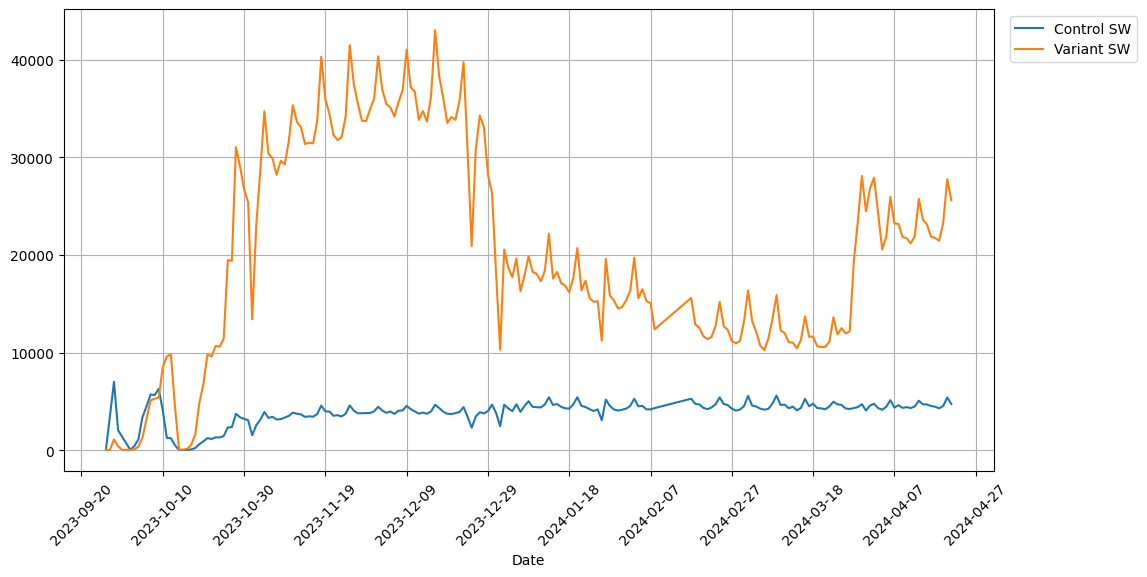

In [161]:
#params
# COND_COUNTRY = ['PT']
# cond_country = df['country'].isin(COND_COUNTRY)

COND_EXPERIMENT_GROUP = ['Variant SW', 'Control SW']
cond_experiment_group = df['exp_group_nsw'].isin(COND_EXPERIMENT_GROUP)

# COND_PLATFORM = ['ANDROID','IOS','DESKTOP']
# cond_platform = df['platform'].isin(COND_PLATFORM)

tmp_filtered = df[cond_experiment_group]

#group data
tmp_group = tmp_filtered.groupby(['p_creation_date','exp_group_nsw'])[['count_ce_dynamic_session_id'
                                                                                  ,'count_swe_dynamic_session_id'
                                                                                  ,'count_oe_dynamic_session_id']].sum().reset_index()

tmp_group['cvr'] = tmp_group['count_oe_dynamic_session_id']/tmp_group['count_swe_dynamic_session_id']

# plot evolution of all sessions
plt.figure(figsize=(12, 6))

sns.lineplot(data=tmp_group, x='p_creation_date', y='count_oe_dynamic_session_id', hue='exp_group_nsw', errorbar=None)

# plot parameters
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.title("")
plt.xlabel("Date")
plt.ylabel("")
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))  # You can adjust the number of ticks as needed

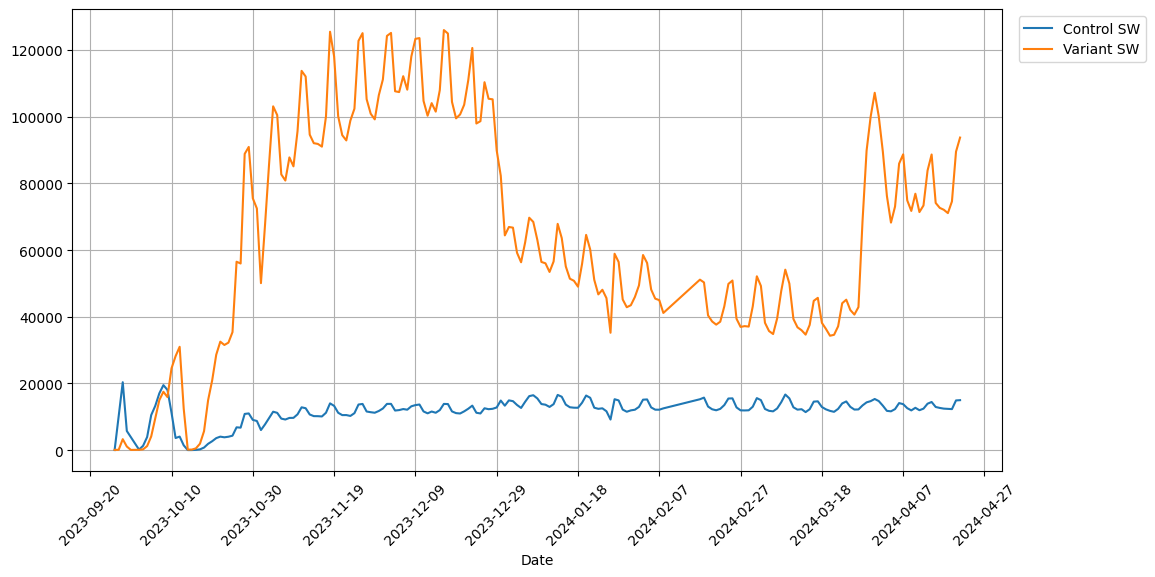

In [162]:
#params
# COND_COUNTRY = ['PT']
# cond_country = df['country'].isin(COND_COUNTRY)

COND_EXPERIMENT_GROUP = ['Variant SW', 'Control SW']
cond_experiment_group = df['exp_group_nsw'].isin(COND_EXPERIMENT_GROUP)

# COND_PLATFORM = ['ANDROID','IOS','DESKTOP']
# cond_platform = df['platform'].isin(COND_PLATFORM)

tmp_filtered = df[cond_experiment_group]

#group data
tmp_group = tmp_filtered.groupby(['p_creation_date','exp_group_nsw'])[['count_ce_dynamic_session_id'
                                                                                  ,'count_swe_dynamic_session_id'
                                                                                  ,'count_oe_dynamic_session_id']].sum().reset_index()

tmp_group['cvr'] = tmp_group['count_oe_dynamic_session_id']/tmp_group['count_swe_dynamic_session_id']

# plot evolution of all sessions
plt.figure(figsize=(12, 6))

sns.lineplot(data=tmp_group, x='p_creation_date', y='count_swe_dynamic_session_id', hue='exp_group_nsw', errorbar=None)

# plot parameters
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.title("")
plt.xlabel("Date")
plt.ylabel("")
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))  # You can adjust the number of ticks as needed

We have replicated the same data as in Looker

## [X] Task 3 Changing the query

Since we have seen that the data is close to Daves analysis, I will start modifying the join to see if I can find anything in particular

In [48]:
# parameters

# category_id
LIST_CATEGORY_ID = [4, 540, 622, 679, 682, 762, 875, 1015, 1082, 1195, 1197, 1214, 1314, 1316, 1551, 1718]
list_category_id = ",".join(str(val) for val in LIST_CATEGORY_ID)
# dates
START_EXPERIMENT = "'2023-09-01'"
END_EXPERIMENT = "'2024-04-22'"
# dates SV
SV_START_EXPERIMENT = "'2024-02-09'"
SV_END_EXPERIMENT = "'2024-02-16'"
# toggles
TOGGLE_INSTORE = "'ZAP_NSW_EXPERIMENT'"
TOGGLE_NSW = "'ZAP_CATEGORY_LANDING_PAGE'"

params = [
    # category_id
    {'name':'list_category_id', 'value':list_category_id},
    # dates
    {'name':'start_experiment', 'value':START_EXPERIMENT},
    {'name':'end_experiment', 'value':END_EXPERIMENT},
    {'name':'sv_start_experiment', 'value':SV_START_EXPERIMENT},
    {'name':'sv_end_experiment', 'value':SV_END_EXPERIMENT},
    # toggles
    {'name':'toggle_instore', 'value':TOGGLE_INSTORE},
    {'name':'toggle_nsw', 'value':TOGGLE_NSW},
]

q = query_engines.QueryEngines(
    query='task3/looker_cvr_modified.sql', 
    params=params,
    load_from_output_file=None, #with no .csv
    output_file='looker_cvr_modified', #with no .csv
    printq=None
)

df = q.query_run_starbust()

c:\Users\Jordi Cremades\Documents\Repository\utils\query_engines.py:145: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/68a3556c62710f03c06ac66f51dce35d157312a42c980bb4b91a9eba7b143291


In [49]:
# we concat the groups
df['groups_concat'] = df['exp_group_nsw'] + '_' + df['exp_group_instore']

# unique values for 
pd.DataFrame({'unique_values': df['groups_concat'].unique()}).sort_values(by='unique_values')

,unique_values
15,Control SW_Control Inprice
2,Control SW_Not Found Instore
14,Control SW_Out of Experiment Inprices
9,Control SW_Variant Inprice
12,Not Found SW_Control Inprice
0,Not Found SW_Not Found Instore
13,Not Found SW_Out of Experiment Inprices
10,Not Found SW_Variant Inprice
11,Out of Experiment SW_Control Inprice
3,Out of Experiment SW_Not Found Instore


In [50]:
# unique values for platforms
pd.DataFrame({'unique_values': df['platform'].unique()}).sort_values(by='unique_values')

,unique_values
0,ANDROID
2,DESKTOP
1,IOS


In [52]:
# unique values for platforms
pd.DataFrame({'unique_values': df['country'].unique()}).sort_values(by='unique_values')

,unique_values
0,AD
31,AL
1,AM
26,AR
2,BA
3,BG
4,CI
30,DO
27,EC
29,EG


C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_19844\1786814696.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_filtered['p_creation_date'] = pd.to_datetime(df['p_creation_date'])


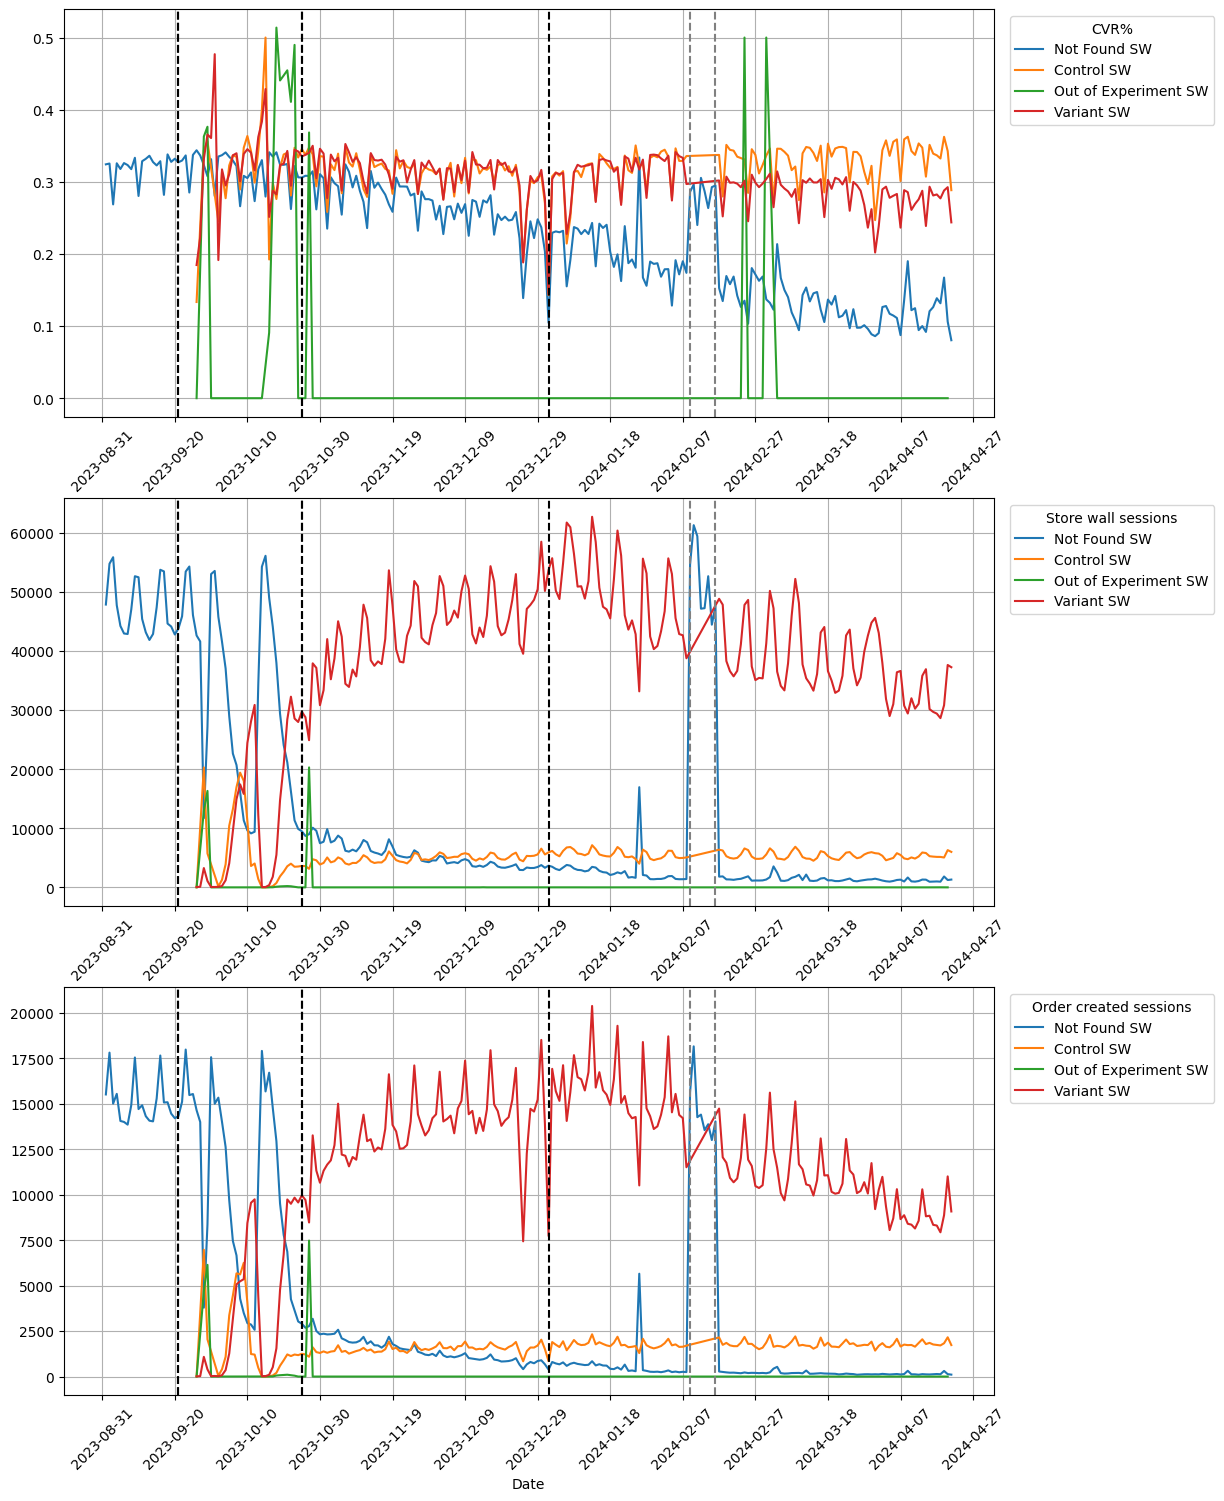

<Figure size 1200x600 with 0 Axes>

In [72]:
#params
# COND_COUNTRY = ['PT']
# cond_country = df['country'].isin(COND_COUNTRY)

# COND_EXPERIMENT_GROUP = ['Variant SW','Control SW']
# cond_experiment_group = df['exp_group_nsw'].isin(COND_EXPERIMENT_GROUP)

COND_PLATFORM = ['ANDROID']
cond_platform = df['platform'].isin(COND_PLATFORM)

tmp_filtered = df[cond_platform]
tmp_filtered['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

#group data
tmp_group = tmp_filtered.groupby(['p_creation_date','exp_group_nsw'])[[
    'count_ce_dynamic_session_id'
    ,'count_swe_dynamic_session_id'
    ,'count_oe_dynamic_session_id']].sum().reset_index()

tmp_group['cvr'] = tmp_group['count_oe_dynamic_session_id']/tmp_group['count_swe_dynamic_session_id']

# plot evolution of all sessions
fig, axes = plt.subplots(3, 1, figsize=(12, 3*6))

plt.figure(figsize=(12, 6))

sns.lineplot(data=tmp_group, x='p_creation_date', y='cvr', hue='exp_group_nsw', errorbar=None, ax=axes[0])
sns.lineplot(data=tmp_group, x='p_creation_date', y='count_swe_dynamic_session_id', hue='exp_group_nsw', errorbar=None, ax=axes[1])
sns.lineplot(data=tmp_group, x='p_creation_date', y='count_oe_dynamic_session_id', hue='exp_group_nsw', errorbar=None, ax=axes[2])

# SV period
for ax in axes:
    ax.axvline(x=pd.to_datetime('2024-02-09'), color='grey', linestyle='--')
    ax.axvline(x=pd.to_datetime('2024-02-16'), color='grey', linestyle='--')
    ## NSW event as custom event instead of screen view in android
    ax.axvline(x=pd.to_datetime('2023-09-21'), color='black', linestyle='--')
    ax.axvline(x=pd.to_datetime('2023-10-25'), color='black', linestyle='--')
    ## iOS NSW accesses do not have category id nor origin
    ax.axvline(x=pd.to_datetime('2024-01-01'), color='black', linestyle='--')
    
# 1st plot
axes[0].legend(title='CVR%', bbox_to_anchor=(1.01, 1), loc='upper left')
axes[0].set_xlabel("Date")
axes[0].set_ylabel("")
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)
axes[0].xaxis.set_major_locator(plt.MaxNLocator(15))
# 2nd plot
axes[1].legend(title='Store wall sessions', bbox_to_anchor=(1.01, 1), loc='upper left')
axes[1].set_xlabel("Date")
axes[1].set_ylabel("")
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)
axes[1].xaxis.set_major_locator(plt.MaxNLocator(15))
# 3rd plot
axes[2].legend(title='Order created sessions', bbox_to_anchor=(1.01, 1), loc='upper left')
axes[2].set_xlabel("Date")
axes[2].set_ylabel("")
axes[2].grid(True)
axes[2].tick_params(axis='x', rotation=45)
axes[2].xaxis.set_major_locator(plt.MaxNLocator(15))

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

La seguent pregunta que vull veure es si el numero total es mante

C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_19844\2723532226.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_filtered['p_creation_date'] = pd.to_datetime(df['p_creation_date'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


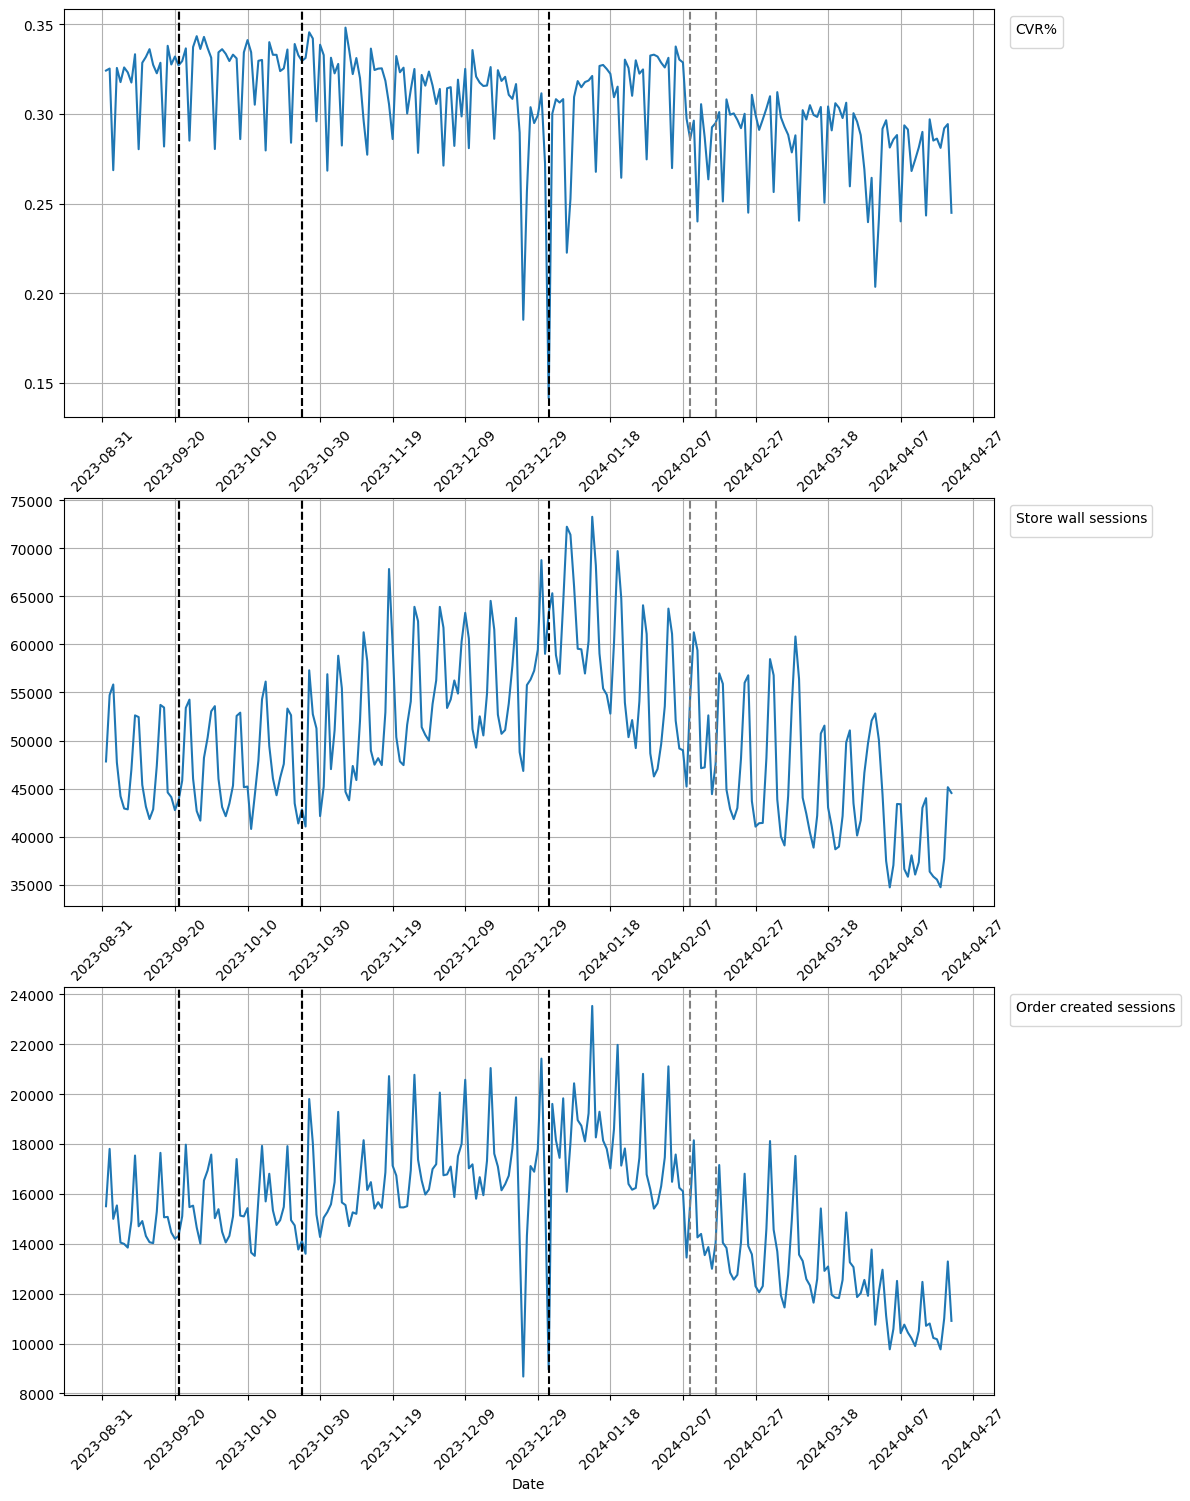

<Figure size 1200x600 with 0 Axes>

In [71]:
#params
# COND_COUNTRY = ['PT']
# cond_country = df['country'].isin(COND_COUNTRY)

# COND_EXPERIMENT_GROUP = ['Variant SW','Control SW']
# cond_experiment_group = df['exp_group_nsw'].isin(COND_EXPERIMENT_GROUP)

COND_PLATFORM = ['ANDROID']
cond_platform = df['platform'].isin(COND_PLATFORM)

tmp_filtered = df[cond_platform]
tmp_filtered['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

#group data
tmp_group = tmp_filtered.groupby(['p_creation_date'])[[
    'count_ce_dynamic_session_id'
    ,'count_swe_dynamic_session_id'
    ,'count_oe_dynamic_session_id']].sum().reset_index()

tmp_group['cvr'] = tmp_group['count_oe_dynamic_session_id']/tmp_group['count_swe_dynamic_session_id']

# plot evolution of all sessions
fig, axes = plt.subplots(3, 1, figsize=(12, 3*6))

plt.figure(figsize=(12, 6))

sns.lineplot(data=tmp_group, x='p_creation_date', y='cvr', errorbar=None, ax=axes[0])
sns.lineplot(data=tmp_group, x='p_creation_date', y='count_swe_dynamic_session_id', errorbar=None, ax=axes[1])
sns.lineplot(data=tmp_group, x='p_creation_date', y='count_oe_dynamic_session_id', errorbar=None, ax=axes[2])

# SV period
for ax in axes:
    ax.axvline(x=pd.to_datetime('2024-02-09'), color='grey', linestyle='--')
    ax.axvline(x=pd.to_datetime('2024-02-16'), color='grey', linestyle='--')
    ## NSW event as custom event instead of screen view in android
    ax.axvline(x=pd.to_datetime('2023-09-21'), color='black', linestyle='--')
    ax.axvline(x=pd.to_datetime('2023-10-25'), color='black', linestyle='--')
    ## iOS NSW accesses do not have category id nor origin
    ax.axvline(x=pd.to_datetime('2024-01-01'), color='black', linestyle='--')
    
# 1st plot
axes[0].legend(title='CVR%', bbox_to_anchor=(1.01, 1), loc='upper left')
axes[0].set_xlabel("Date")
axes[0].set_ylabel("")
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)
axes[0].xaxis.set_major_locator(plt.MaxNLocator(15))
# 2nd plot
axes[1].legend(title='Store wall sessions', bbox_to_anchor=(1.01, 1), loc='upper left')
axes[1].set_xlabel("Date")
axes[1].set_ylabel("")
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)
axes[1].xaxis.set_major_locator(plt.MaxNLocator(15))
# 3rd plot
axes[2].legend(title='Order created sessions', bbox_to_anchor=(1.01, 1), loc='upper left')
axes[2].set_xlabel("Date")
axes[2].set_ylabel("")
axes[2].grid(True)
axes[2].tick_params(axis='x', rotation=45)
axes[2].xaxis.set_major_locator(plt.MaxNLocator(15))

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

The totals are decreasing. CVR% has decreased in general ([LINK](https://glovoapp2.cloud.looker.com/explore/mfc_dm/groceries_nsw_tracker_v0?qid=vJvT7uY0nA0XnhOawtq0Gl&origin_space=4713&toggle=fil,vis)), as well as store wall sessions ([LINK](https://glovoapp2.cloud.looker.com/explore/mfc_dm/groceries_nsw_tracker_v0?qid=YDSpQkDQb1vQVklpReDm6d&origin_space=4713&toggle=fil,vis)) and orders created ([LINK](https://glovoapp2.cloud.looker.com/explore/mfc_dm/groceries_nsw_tracker_v0?qid=ZiH6E9mzhdGDQuZKkYKoYu&origin_space=4713&toggle=fil,vis)). 

## [X] Task 4 Category id issue hypothesis

I think that after SV maybe we have seen a drop of sessions both for Store Wall and order created in the number of orders created

In [76]:
# parameters

# category_id
LIST_CATEGORY_ID = [4, 540, 622, 679, 682, 762, 875, 1015, 1082, 1195, 1197, 1214, 1314, 1316, 1551, 1718]
list_category_id = ",".join(str(val) for val in LIST_CATEGORY_ID)
# dates
START_EXPERIMENT = "'2023-09-01'"
END_EXPERIMENT = "'2024-04-22'"
# dates SV
SV_START_EXPERIMENT = "'2024-02-09'"
SV_END_EXPERIMENT = "'2024-02-16'"
# toggles
TOGGLE_INSTORE = "'ZAP_NSW_EXPERIMENT'"
TOGGLE_NSW = "'ZAP_CATEGORY_LANDING_PAGE'"

params = [
    # category_id
    {'name':'list_category_id', 'value':list_category_id},
    # dates
    {'name':'start_experiment', 'value':START_EXPERIMENT},
    {'name':'end_experiment', 'value':END_EXPERIMENT},
    {'name':'sv_start_experiment', 'value':SV_START_EXPERIMENT},
    {'name':'sv_end_experiment', 'value':SV_END_EXPERIMENT},
    # toggles
    {'name':'toggle_instore', 'value':TOGGLE_INSTORE},
    {'name':'toggle_nsw', 'value':TOGGLE_NSW},
]

q = query_engines.QueryEngines(
    query='task4/category_id_hypothesis.sql', 
    params=params,
    load_from_output_file=None, #with no .csv
    output_file='category_id_hypothesis', #with no .csv
    printq=None
)

df = q.query_run_starbust()

c:\Users\Jordi Cremades\Documents\Repository\utils\query_engines.py:145: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/82e2aab3cc05a9932a3576bde40bb9db2954402e88591931f1fbf3f494e18cbb


In [78]:
# we concat the groups
df['groups_concat'] = df['exp_group_nsw'] + '_' + df['exp_group_instore']

# unique values for 
pd.DataFrame({'unique_values': df['groups_concat'].unique()}).sort_values(by='unique_values')

,unique_values
15,Control SW_Control Inprice
2,Control SW_Not Found Instore
14,Control SW_Out of Experiment Inprices
9,Control SW_Variant Inprice
12,Not Found SW_Control Inprice
0,Not Found SW_Not Found Instore
13,Not Found SW_Out of Experiment Inprices
10,Not Found SW_Variant Inprice
11,Out of Experiment SW_Control Inprice
3,Out of Experiment SW_Not Found Instore


In [79]:
# unique values for platforms
pd.DataFrame({'unique_values': df['platform'].unique()}).sort_values(by='unique_values')

,unique_values
0,ANDROID
2,DESKTOP
1,IOS


In [80]:
# unique values for platforms
pd.DataFrame({'unique_values': df['country'].unique()}).sort_values(by='unique_values')

,unique_values
0,AD
31,AL
1,AM
26,AR
2,BA
3,BG
4,CI
30,DO
27,EC
29,EG


We now look at the number of sessions in the New Store Wall and Category opened with a category id different from zero

C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_19844\1422078342.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_filtered['p_creation_date'] = pd.to_datetime(df['p_creation_date'])


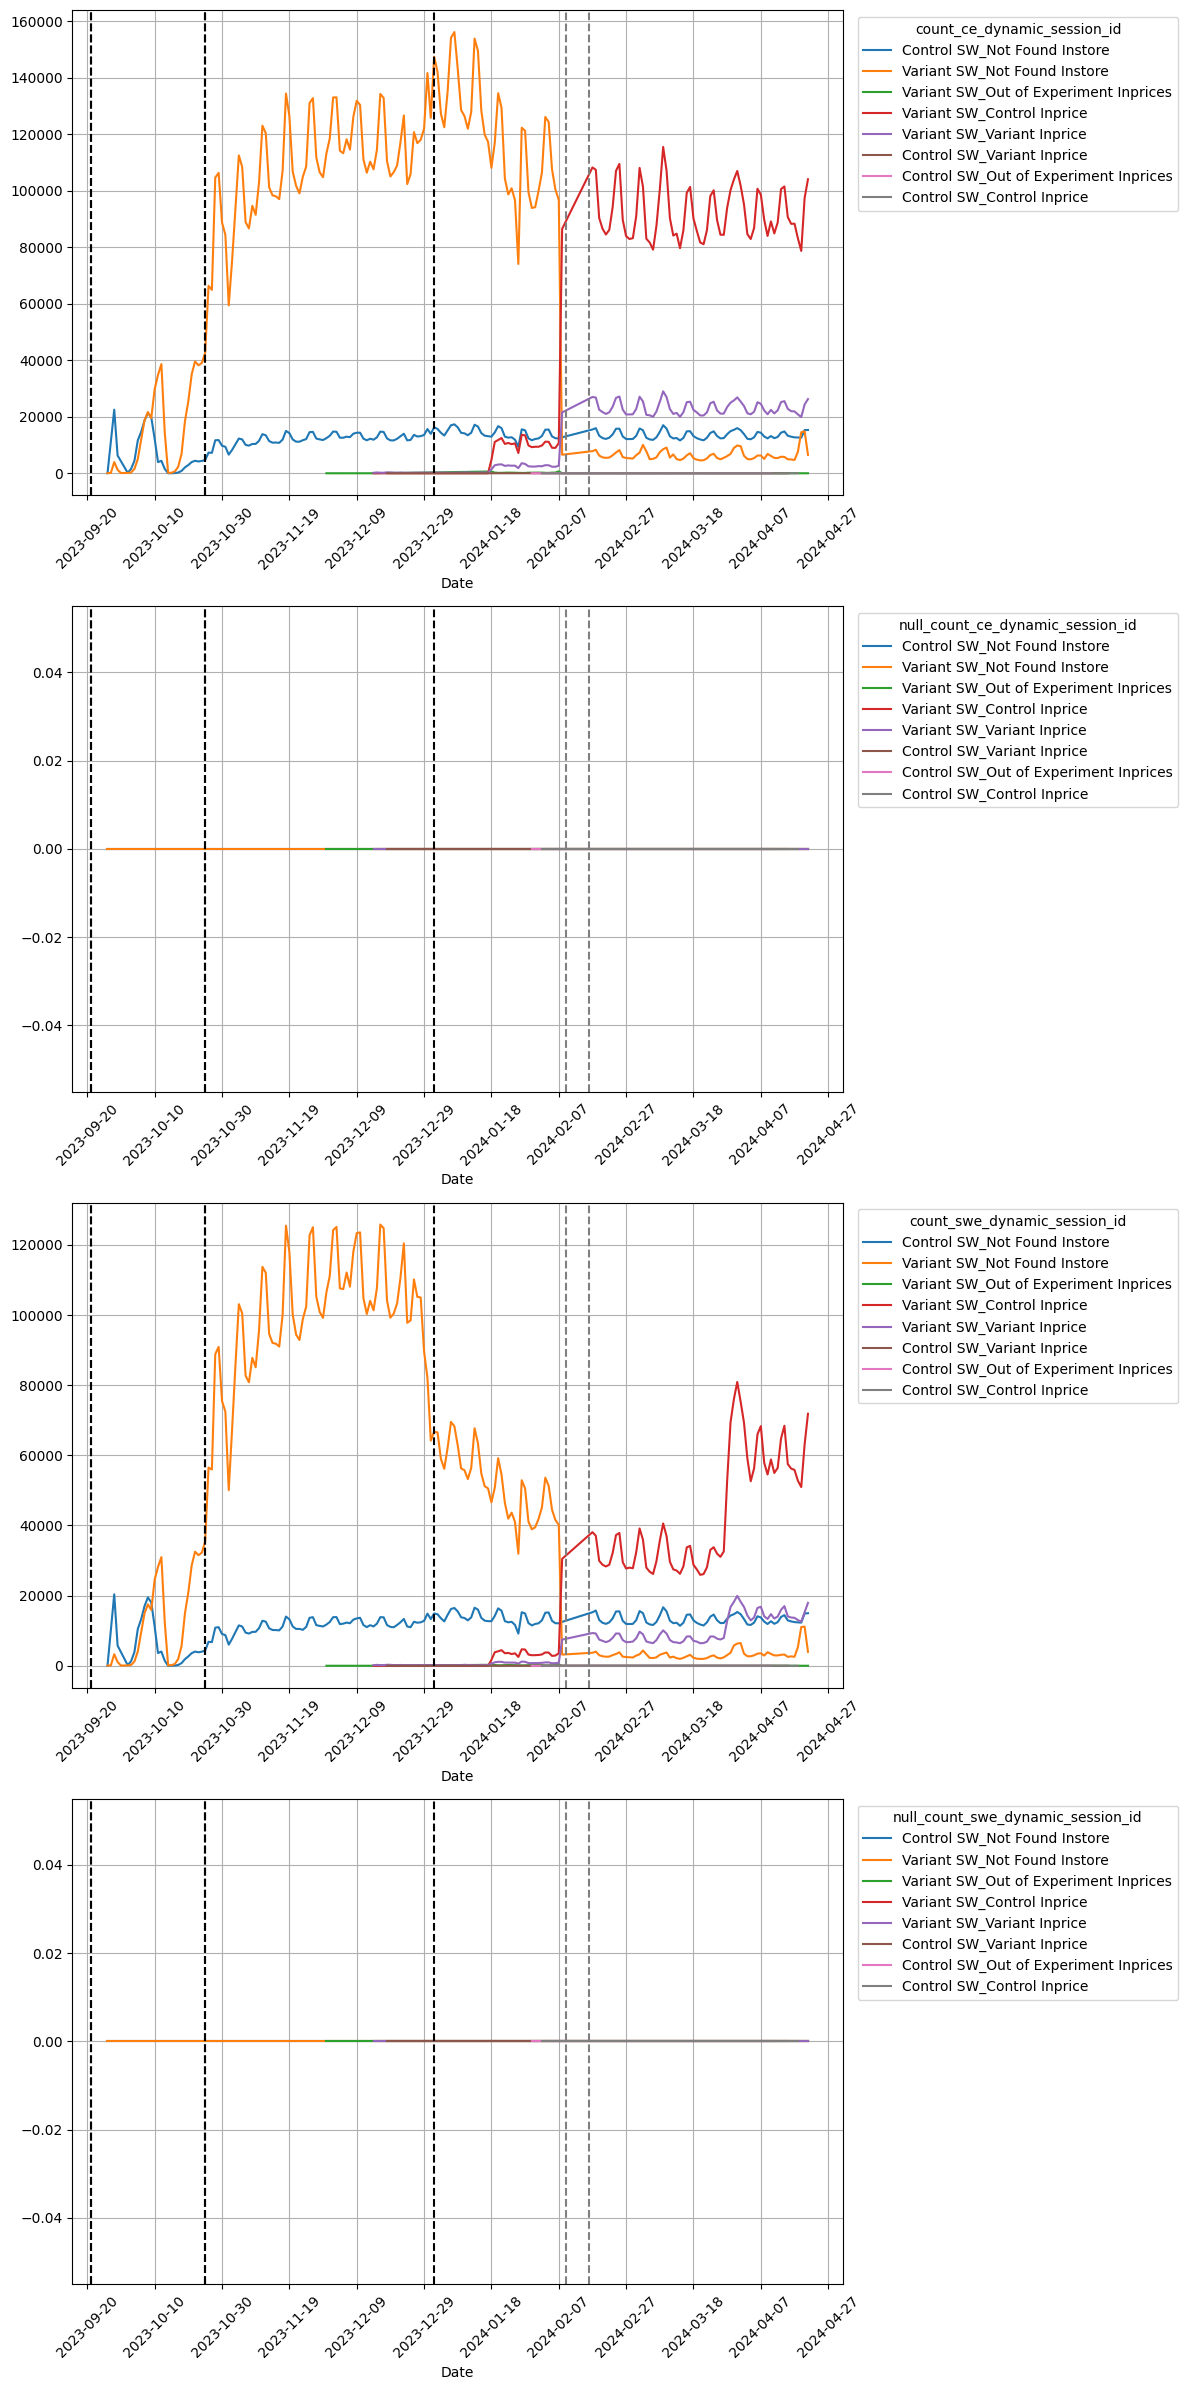

In [92]:
#params
# COND_COUNTRY = ['PT']
# cond_country = df['country'].isin(COND_COUNTRY)

COND_EXPERIMENT_GROUP = ['Out of Experiment SW', 'Not Found SW']
cond_experiment_group = df['exp_group_nsw'].isin(COND_EXPERIMENT_GROUP)

# COND_PLATFORM = ['ANDROID']
# cond_platform = df['platform'].isin(COND_PLATFORM)

tmp_filtered = df[~cond_experiment_group]
tmp_filtered['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

#group data
tmp_group = tmp_filtered.groupby(['p_creation_date','groups_concat'])[[
    'count_ce_dynamic_session_id'
    ,'null_count_ce_dynamic_session_id'
    ,'count_swe_dynamic_session_id'
    ,'null_count_swe_dynamic_session_id']].sum().reset_index()

# plot evolution of all sessions
fig, axes = plt.subplots(4, 1, figsize=(12, 4*6))

sns.lineplot(data=tmp_group, x='p_creation_date', y='count_ce_dynamic_session_id', hue='groups_concat', errorbar=None, ax=axes[0])
sns.lineplot(data=tmp_group, x='p_creation_date', y='null_count_ce_dynamic_session_id', hue='groups_concat', errorbar=None, ax=axes[1])
sns.lineplot(data=tmp_group, x='p_creation_date', y='count_swe_dynamic_session_id', hue='groups_concat', errorbar=None, ax=axes[2])
sns.lineplot(data=tmp_group, x='p_creation_date', y='null_count_swe_dynamic_session_id', hue='groups_concat', errorbar=None, ax=axes[3])

# SV period
for ax in axes:
    ax.axvline(x=pd.to_datetime('2024-02-09'), color='grey', linestyle='--')
    ax.axvline(x=pd.to_datetime('2024-02-16'), color='grey', linestyle='--')
    ## NSW event as custom event instead of screen view in android
    ax.axvline(x=pd.to_datetime('2023-09-21'), color='black', linestyle='--')
    ax.axvline(x=pd.to_datetime('2023-10-25'), color='black', linestyle='--')
    ## iOS NSW accesses do not have category id nor origin
    ax.axvline(x=pd.to_datetime('2024-01-01'), color='black', linestyle='--')
    
# 1st plot
axes[0].legend(title='count_ce_dynamic_session_id', bbox_to_anchor=(1.01, 1), loc='upper left')
axes[0].set_xlabel("Date")
axes[0].set_ylabel("")
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)
axes[0].xaxis.set_major_locator(plt.MaxNLocator(15))
# 2nd plot
axes[1].legend(title='null_count_ce_dynamic_session_id', bbox_to_anchor=(1.01, 1), loc='upper left')
axes[1].set_xlabel("Date")
axes[1].set_ylabel("")
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)
axes[1].xaxis.set_major_locator(plt.MaxNLocator(15))
# 3rd plot
axes[2].legend(title='count_swe_dynamic_session_id', bbox_to_anchor=(1.01, 1), loc='upper left')
axes[2].set_xlabel("Date")
axes[2].set_ylabel("")
axes[2].grid(True)
axes[2].tick_params(axis='x', rotation=45)
axes[2].xaxis.set_major_locator(plt.MaxNLocator(15))
# 4tf plot
axes[3].legend(title='null_count_swe_dynamic_session_id', bbox_to_anchor=(1.01, 1), loc='upper left')
axes[3].set_xlabel("Date")
axes[3].set_ylabel("")
axes[3].grid(True)
axes[3].tick_params(axis='x', rotation=45)
axes[3].xaxis.set_major_locator(plt.MaxNLocator(15))

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_19844\1994144419.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_filtered['p_creation_date'] = pd.to_datetime(df['p_creation_date'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with a

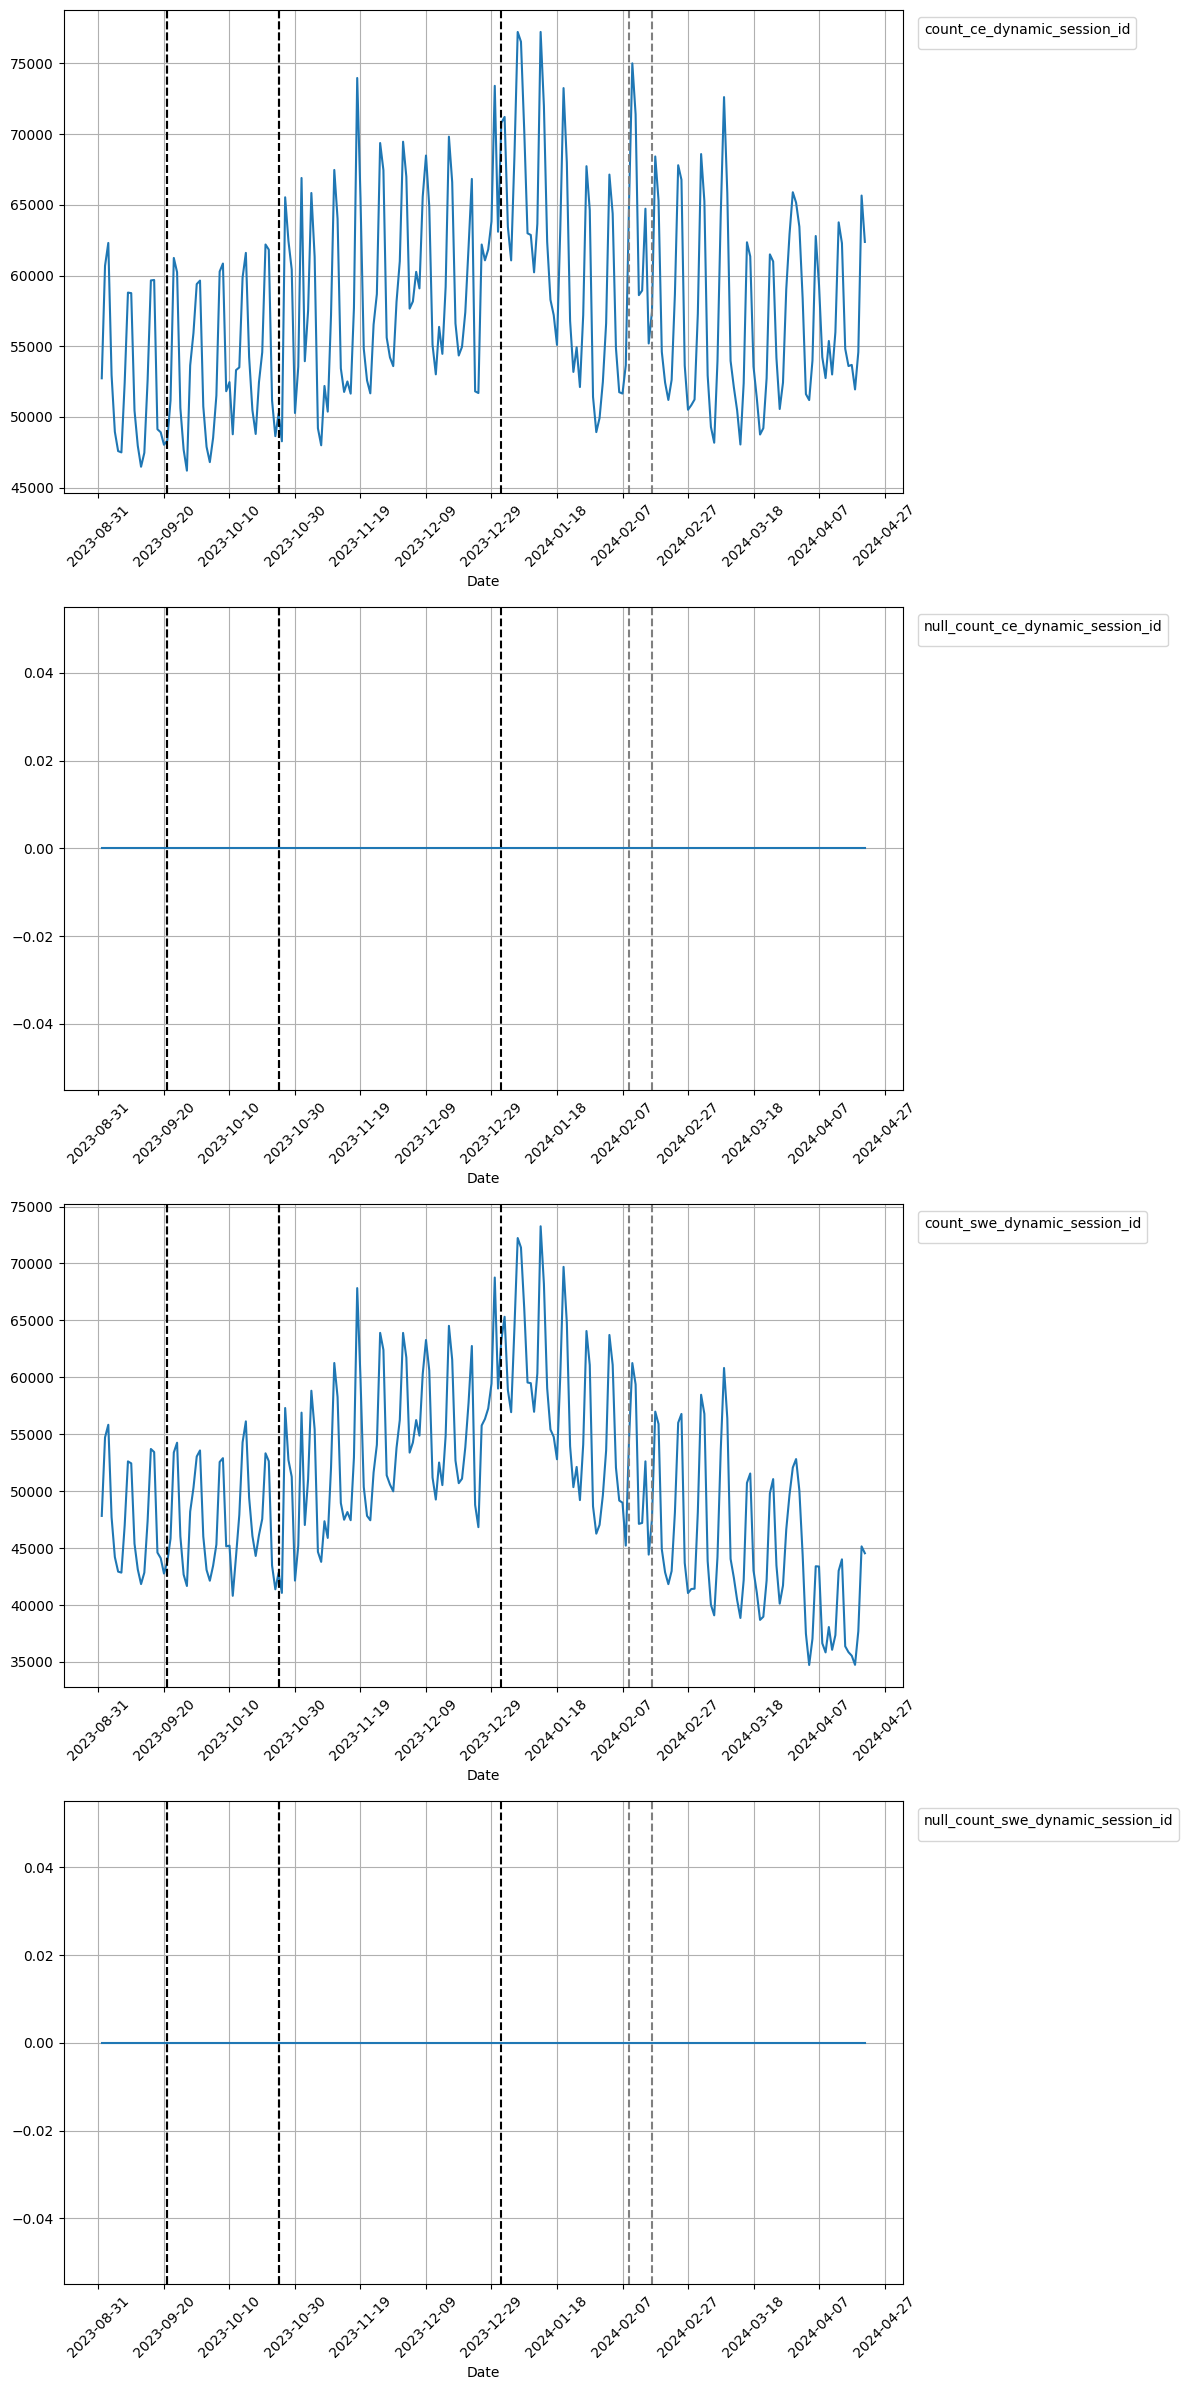

In [95]:
#params
# COND_COUNTRY = ['PT']
# cond_country = df['country'].isin(COND_COUNTRY)

# COND_EXPERIMENT_GROUP = ['Variant SW','Control SW']
# cond_experiment_group = df['exp_group_nsw'].isin(COND_EXPERIMENT_GROUP)

COND_PLATFORM = ['ANDROID']
cond_platform = df['platform'].isin(COND_PLATFORM)

tmp_filtered = df[cond_platform]
tmp_filtered['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

#group data
tmp_group = tmp_filtered.groupby(['p_creation_date'])[[
    'count_ce_dynamic_session_id'
    ,'null_count_ce_dynamic_session_id'
    ,'count_swe_dynamic_session_id'
    ,'null_count_swe_dynamic_session_id']].sum().reset_index()

# plot evolution of all sessions
fig, axes = plt.subplots(4, 1, figsize=(12, 4*6))

sns.lineplot(data=tmp_group, x='p_creation_date', y='count_ce_dynamic_session_id', errorbar=None, ax=axes[0])
sns.lineplot(data=tmp_group, x='p_creation_date', y='null_count_ce_dynamic_session_id', errorbar=None, ax=axes[1])
sns.lineplot(data=tmp_group, x='p_creation_date', y='count_swe_dynamic_session_id', errorbar=None, ax=axes[2])
sns.lineplot(data=tmp_group, x='p_creation_date', y='null_count_swe_dynamic_session_id', errorbar=None, ax=axes[3])

# SV period
for ax in axes:
    ax.axvline(x=pd.to_datetime('2024-02-09'), color='grey', linestyle='--')
    ax.axvline(x=pd.to_datetime('2024-02-16'), color='grey', linestyle='--')
    ## NSW event as custom event instead of screen view in android
    ax.axvline(x=pd.to_datetime('2023-09-21'), color='black', linestyle='--')
    ax.axvline(x=pd.to_datetime('2023-10-25'), color='black', linestyle='--')
    ## iOS NSW accesses do not have category id nor origin
    ax.axvline(x=pd.to_datetime('2024-01-01'), color='black', linestyle='--')
    
# 1st plot
axes[0].legend(title='count_ce_dynamic_session_id', bbox_to_anchor=(1.01, 1), loc='upper left')
axes[0].set_xlabel("Date")
axes[0].set_ylabel("")
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)
axes[0].xaxis.set_major_locator(plt.MaxNLocator(15))
# 2nd plot
axes[1].legend(title='null_count_ce_dynamic_session_id', bbox_to_anchor=(1.01, 1), loc='upper left')
axes[1].set_xlabel("Date")
axes[1].set_ylabel("")
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)
axes[1].xaxis.set_major_locator(plt.MaxNLocator(15))
# 3rd plot
axes[2].legend(title='count_swe_dynamic_session_id', bbox_to_anchor=(1.01, 1), loc='upper left')
axes[2].set_xlabel("Date")
axes[2].set_ylabel("")
axes[2].grid(True)
axes[2].tick_params(axis='x', rotation=45)
axes[2].xaxis.set_major_locator(plt.MaxNLocator(15))
# 4tf plot
axes[3].legend(title='null_count_swe_dynamic_session_id', bbox_to_anchor=(1.01, 1), loc='upper left')
axes[3].set_xlabel("Date")
axes[3].set_ylabel("")
axes[3].grid(True)
axes[3].tick_params(axis='x', rotation=45)
axes[3].xaxis.set_major_locator(plt.MaxNLocator(15))

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Looking at the totals. I see that after the 1st of JAN there is a drop, especially in the New Store Walls

## [ ] Task 5 Evolution of Category id Store Wall Sessions

Now I want to see what is the evolution of Store Wall Sessions Category ids. I think that after the 1st of JAN there will be more entires with category id is null

In [97]:
# parameters

# category_id
LIST_CATEGORY_ID = [4, 540, 622, 679, 682, 762, 875, 1015, 1082, 1195, 1197, 1214, 1314, 1316, 1551, 1718]
list_category_id = ",".join(str(val) for val in LIST_CATEGORY_ID)
# dates
START_EXPERIMENT = "'2023-09-01'"
END_EXPERIMENT = "'2024-04-22'"
# dates SV
SV_START_EXPERIMENT = "'2024-02-09'"
SV_END_EXPERIMENT = "'2024-02-16'"
# toggles
TOGGLE_INSTORE = "'ZAP_NSW_EXPERIMENT'"
TOGGLE_NSW = "'ZAP_CATEGORY_LANDING_PAGE'"

params = [
    # category_id
    {'name':'list_category_id', 'value':list_category_id},
    # dates
    {'name':'start_experiment', 'value':START_EXPERIMENT},
    {'name':'end_experiment', 'value':END_EXPERIMENT},
    {'name':'sv_start_experiment', 'value':SV_START_EXPERIMENT},
    {'name':'sv_end_experiment', 'value':SV_END_EXPERIMENT},
    # toggles
    {'name':'toggle_instore', 'value':TOGGLE_INSTORE},
    {'name':'toggle_nsw', 'value':TOGGLE_NSW},
]

q = query_engines.QueryEngines(
    query='task5/store_wall_category_id_evolution.sql', 
    params=params,
    load_from_output_file=None, #with no .csv
    output_file='store_wall_category_id_evolution', #with no .csv
    printq=None
)

df = q.query_run_starbust()

c:\Users\Jordi Cremades\Documents\Repository\utils\query_engines.py:145: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/ec0093656702f83eba04643c3dcc86e9a6fa953fe57bcd19ccbbf21c59238d9d


In [98]:
# we concat the groups
df['groups_concat'] = df['exp_group_nsw'] + '_' + df['exp_group_instore']

# unique values for 
pd.DataFrame({'unique_values': df['groups_concat'].unique()}).sort_values(by='unique_values')

,unique_values
15,Control SW_Control Inprice
2,Control SW_Not Found Instore
14,Control SW_Out of Experiment Inprices
9,Control SW_Variant Inprice
12,Not Found SW_Control Inprice
0,Not Found SW_Not Found Instore
13,Not Found SW_Out of Experiment Inprices
10,Not Found SW_Variant Inprice
11,Out of Experiment SW_Control Inprice
3,Out of Experiment SW_Not Found Instore


In [99]:
# unique values for platforms
pd.DataFrame({'unique_values': df['platform'].unique()}).sort_values(by='unique_values')

,unique_values
0,Android
3,Desktop
1,IOS
2,Mobile Web
4,iOS


In [100]:
# unique values for platforms
pd.DataFrame({'unique_values': df['country'].unique()}).sort_values(by='unique_values')

,unique_values
0,AD
1,AM
2,BA
3,BG
4,BY
5,CI
30,DO
29,EG
6,ES
7,GE


In [122]:
df

,p_creation_date,country,platform,exp_group_nsw,exp_group_instore,category_id,count_swe_dynamic_session_id,groups_concat
0,2023-09-01,AD,Android,Not Found SW,Not Found Instore,4,5,Not Found SW_Not Found Instore
1,2023-09-01,AD,IOS,Not Found SW,Not Found Instore,4,9,Not Found SW_Not Found Instore
2,2023-09-01,AD,Mobile Web,Not Found SW,Not Found Instore,4,2,Not Found SW_Not Found Instore
3,2023-09-01,AM,Android,Not Found SW,Not Found Instore,1551,119,Not Found SW_Not Found Instore
4,2023-09-01,AM,Desktop,Not Found SW,Not Found Instore,1551,18,Not Found SW_Not Found Instore
...,...,...,...,...,...,...,...,...
65347,2024-04-21,UG,IOS,Variant SW,Variant Inprice,4,47,Variant SW_Variant Inprice
65348,2024-04-21,UG,Mobile Web,Not Found SW,Not Found Instore,4,15,Not Found SW_Not Found Instore
65349,2024-04-22,ES,Android,Variant SW,Control Inprice,4,1,Variant SW_Control Inprice
65350,2024-04-22,ES,Android,Variant SW,Not Found Instore,4,1,Variant SW_Not Found Instore


C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_19844\726192938.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_filtered['p_creation_date'] = pd.to_datetime(df['p_creation_date'])
C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_19844\726192938.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_filtered['category_id'] = tmp_filtered['category_id'].astype(str)


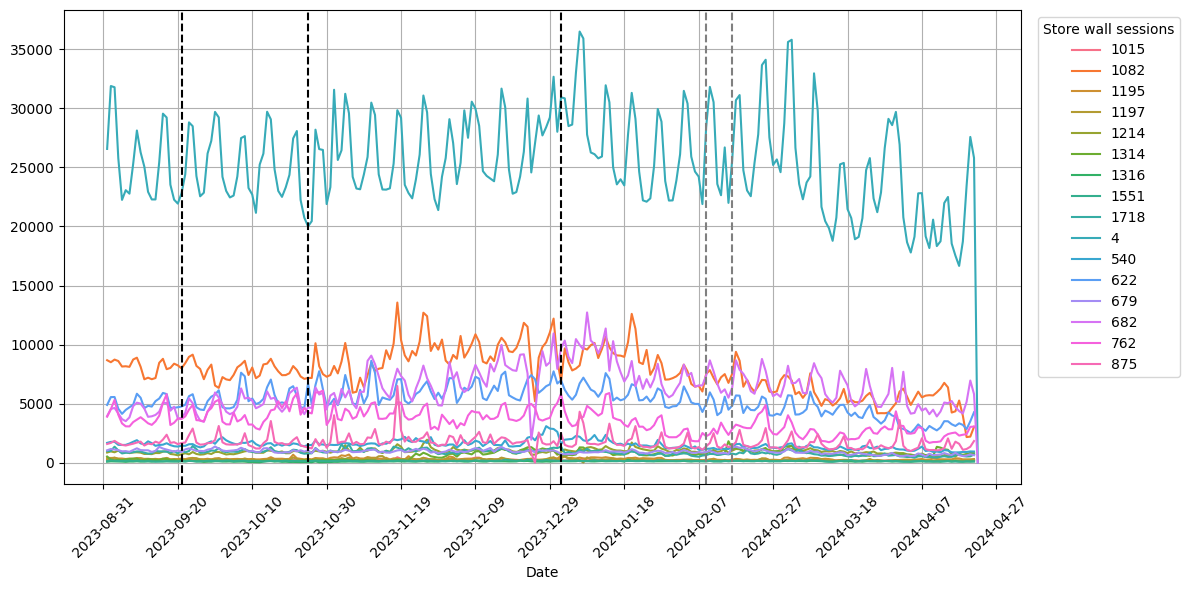

In [123]:
#params
# COND_COUNTRY = ['PT']
# cond_country = df['country'].isin(COND_COUNTRY)

# COND_EXPERIMENT_GROUP = ['Variant SW','Control SW']
# cond_experiment_group = df['exp_group_nsw'].isin(COND_EXPERIMENT_GROUP)

COND_PLATFORM = ['Android']
cond_platform = df['platform'].isin(COND_PLATFORM)

tmp_filtered = df[cond_platform]
tmp_filtered['p_creation_date'] = pd.to_datetime(df['p_creation_date'])
tmp_filtered['category_id'] = tmp_filtered['category_id'].astype(str)

#group data
tmp_group = tmp_filtered.groupby(['p_creation_date','category_id'])[[
    'count_swe_dynamic_session_id']].sum().reset_index()

# plot evolution of all sessions
plt.figure(figsize=(12, 6))

sns.lineplot(data=tmp_group, x='p_creation_date', y='count_swe_dynamic_session_id', hue='category_id', errorbar=None)

# SV period
plt.axvline(x=pd.to_datetime('2024-02-09'), color='grey', linestyle='--')
plt.axvline(x=pd.to_datetime('2024-02-16'), color='grey', linestyle='--')
## NSW event as custom event instead of screen view in android
plt.axvline(x=pd.to_datetime('2023-09-21'), color='black', linestyle='--')
plt.axvline(x=pd.to_datetime('2023-10-25'), color='black', linestyle='--')
## iOS NSW accesses do not have category id nor origin
plt.axvline(x=pd.to_datetime('2024-01-01'), color='black', linestyle='--')
    
# 1st plot
plt.legend(title='Store wall sessions', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.xlabel("Date")
plt.ylabel("")
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

After a certain date, we see that sessions that reach the store wall have less and less categories from the list

In [124]:
df.head()

,p_creation_date,country,platform,exp_group_nsw,exp_group_instore,category_id,count_swe_dynamic_session_id,groups_concat
0,2023-09-01,AD,Android,Not Found SW,Not Found Instore,4,5,Not Found SW_Not Found Instore
1,2023-09-01,AD,IOS,Not Found SW,Not Found Instore,4,9,Not Found SW_Not Found Instore
2,2023-09-01,AD,Mobile Web,Not Found SW,Not Found Instore,4,2,Not Found SW_Not Found Instore
3,2023-09-01,AM,Android,Not Found SW,Not Found Instore,1551,119,Not Found SW_Not Found Instore
4,2023-09-01,AM,Desktop,Not Found SW,Not Found Instore,1551,18,Not Found SW_Not Found Instore


C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_19844\260577900.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_filtered['p_creation_date'] = pd.to_datetime(df['p_creation_date'])
C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_19844\260577900.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_filtered['category_id'] = tmp_filtered['category_id'].astype(str)


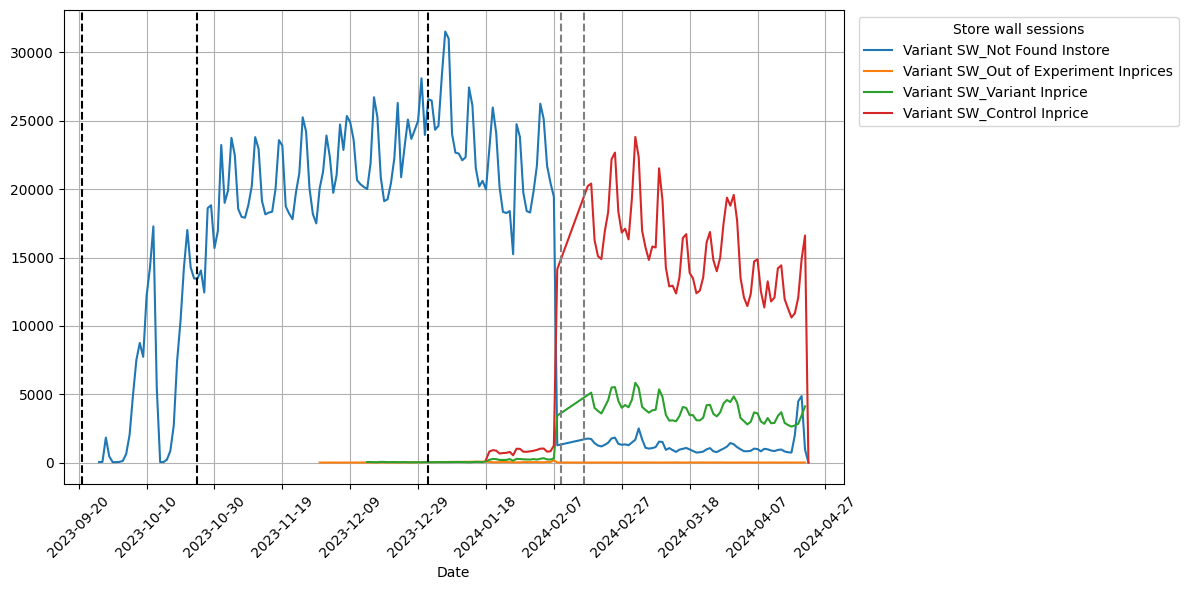

In [144]:
#params
# COND_COUNTRY = ['PT']
# cond_country = df['country'].isin(COND_COUNTRY)

COND_EXPERIMENT_GROUP = ['Variant SW']
cond_experiment_group = df['exp_group_nsw'].isin(COND_EXPERIMENT_GROUP)

COND_PLATFORM = ['Android']
cond_platform = df['platform'].isin(COND_PLATFORM)

COND_CATEGORY_ID = ['4']
cond_category_id = df['category_id'].isin(COND_CATEGORY_ID)

tmp_filtered = df[cond_experiment_group & cond_category_id & cond_platform]
tmp_filtered['p_creation_date'] = pd.to_datetime(df['p_creation_date'])
tmp_filtered['category_id'] = tmp_filtered['category_id'].astype(str)

#group data
tmp_group = tmp_filtered.groupby(['p_creation_date','category_id','groups_concat'])[[
    'count_swe_dynamic_session_id']].sum().reset_index()

# plot evolution of all sessions
plt.figure(figsize=(12, 6))

sns.lineplot(data=tmp_group, x='p_creation_date', y='count_swe_dynamic_session_id', hue='groups_concat', errorbar=None)

# SV period
plt.axvline(x=pd.to_datetime('2024-02-09'), color='grey', linestyle='--')
plt.axvline(x=pd.to_datetime('2024-02-16'), color='grey', linestyle='--')
## NSW event as custom event instead of screen view in android
plt.axvline(x=pd.to_datetime('2023-09-21'), color='black', linestyle='--')
plt.axvline(x=pd.to_datetime('2023-10-25'), color='black', linestyle='--')
## iOS NSW accesses do not have category id nor origin
plt.axvline(x=pd.to_datetime('2024-01-01'), color='black', linestyle='--')
    
# 1st plot
plt.legend(title='Store wall sessions', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.xlabel("Date")
plt.ylabel("")
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Veiem com la category id 4 va baixant paulatinament, desde el 1 de JAN. Llavors era el problema amb iOS, potser encara no esta resolt